In [4]:
#imports
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [15]:
df789 = pd.read_csv("/content/finalmerged.csv", sep=',', decimal= '.', encoding='latin-1')
df789.head()

,Unnamed: 0,customerid,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,good_bad_flag,...,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,month_approved_loan,exceeds_loan_term_days,TipoInteres
0,0,8a858e135cb22031015cbafc76964ebd,3.319219,6.528604,0,2,10000.0,13000.0,30,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,June,1.0,1.0
1,1,8a858e275c7ea5ec015c82482d7c3996,3.325598,7.119403,0,2,10000.0,13000.0,30,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,June,1.0,1.0
2,2,8a858e5b5bd99460015bdc95cd485634,5.746100,5.563174,0,4,10000.0,13000.0,30,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,June,1.0,1.0
3,3,8a858e5b5bd99460015bdc95cd485634,5.746100,5.563174,0,4,10000.0,13000.0,30,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,May,1.0,1.0
4,4,8a858e5b5bd99460015bdc95cd485634,5.746100,5.563174,0,4,10000.0,13000.0,30,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,May,0.0,1.0


In [19]:
df78= df789.drop(['customerid'], axis=1)

In [27]:
df7= df78.drop(['month_approved_loan'], axis=1)

In [33]:
df= df7.dropna()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13697
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                13693 non-null  int64  
 1   longitude_gps                             13693 non-null  float64
 2   latitude_gps                              13693 non-null  float64
 3   bank_branch_clients                       13693 non-null  int64  
 4   loannumber                                13693 non-null  int64  
 5   loanamount                                13693 non-null  float64
 6   totaldue                                  13693 non-null  float64
 7   termdays                                  13693 non-null  int64  
 8   good_bad_flag                             13693 non-null  int64  
 9   referred                                  13693 non-null  int64  
 10  realage                           

**SLIPT DATA**

In [34]:
dep_var = "good_bad_flag" #target varaible
cond = np.random.rand(len(df))>.2 #número de lineas randome de nuestro data set 80% sera 1, otro 0
train = np.where(cond)[0] #training at 80%
valid = np.where(~cond)[0] #validation at 20%
len(train), len(valid)    #check size

(10975, 2718)

In [35]:
train_df = df.iloc[train]  #get training dataframe
valid_df = df.iloc[valid]  #get validation dataframe
len(train_df), len(valid_df)   #check size

(10975, 2718)

In [36]:
train_y = train_df["good_bad_flag"]   #pull out target var
train_xs = train_df.drop(["good_bad_flag"], axis=1)   # drop target var from training data

In [37]:
valid_y = valid_df["good_bad_flag"]  #pull out target variable
valid_xs = valid_df.drop(["good_bad_flag"], axis=1)   #drop target var from valid data

**TRAIN MODEL**

In [38]:
#TRAIN MODEL
m = KNeighborsClassifier()
m = m.fit(train_xs,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


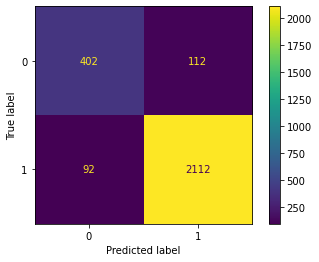

In [40]:
plot_confusion_matrix(estimator=m,X=valid_xs, y_true=valid_y)

In [41]:
std_score = m.score(valid_xs,valid_y)
std_score


0.9249448123620309

In [46]:
data = {'longitude_gps':[0], 'latitude_gps':[0], 'bank_branch_clients':[0], 'loannumber':[0], 'loanamount':[0], 'totaldue':[0], 'termdays':[0], 'referred':[0], 'realage':[0], 'TipoInteresAhora':[0], 'bank_account_Current':[0], 'bank_account_Other':[0], 'bank_account_Savings':[0], 'level_of_education_clients_Graduate':[0], 'level_of_education_Post-Graduate':[0], 'level_of_education_clients_Primary':[0], 'level_of_educationclients_Secondary':[0], 'level_of_education_clients_Unknown':[0], 'bank_name_client_Access Bank':[0], 'bank_name_client_Diamond Bank':[0], 'bank_name_client_EcoBank':[0], 'bank_name_client_FCMB':[0], 'bank_name_client_Fidelity Bank':[0], 'bank_name_client_First Bank':[0], 'bank_name_client_GT Bank':[0], 'bank_name_client_Heritage Bank':[0], 'bank_name_client_Keystone Bank':[0],'bank_name_client_Skye Bank':[0], 'bank_name_client_Stanbic IBTC':[0], 'bank_name_client_Standard Chartered':[0], 'bank_name_client_Sterling Bank':[0], 'bank_name_client_UBA':[0], 'bank_name_client_Union Bank':[0], 'bank_name_client_Unity Bank':[0], 'bank_name_client_Wema Bank':[0], 'bank_name_client_Zenith Bank':[0],'employment_status_client_Contract':[0], 'employment_status_client_Permanent':[0], 'employment_status_client_Retired':[0], 'employment_status_client_Self-Employed':[0], 'employment_status_client_Student':[0], 'employment_status_client_Unemployed':[0], 'employment_status_client_Unknown':[0], 'is_late_for_firstpay':[0], 'exceeds_loan_term_days':[0], 'TipoInteres':[0]}
feat_imp = pd.DataFrame(data)
feat_imp.head()   

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Contract,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
valid_LOGGPS = valid_xs.copy()
valid_LOGGPS['longitude_gps'] = np.random.permutation(valid_LOGGPS['longitude_gps'])
valid_LOGGPS.head()

,Unnamed: 0,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,...,employment_status_client_Contract,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres
1,1,5.761748,7.119403,0,2,10000.0,13000.0,30,0,36,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.00
5,5,3.260152,6.642485,0,2,10000.0,11500.0,15,0,30,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.00
14,14,3.257262,6.608266,0,7,30000.0,34500.0,30,0,27,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.00
18,18,11.178342,6.608266,0,7,30000.0,34500.0,30,0,27,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.75
22,22,3.395891,6.512517,0,5,20000.0,24500.0,30,0,36,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.00


LONGITUDE GPS

In [50]:
m.score(valid_LOGGPS, valid_y)

0.9242089771891097

In [51]:
feat_imp['longitude_gps'] = std_score - m.score(valid_LOGGPS,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Contract,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres
0,0.000736,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


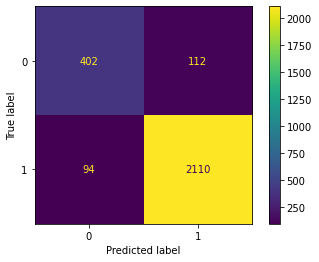

In [52]:
plot_confusion_matrix(estimator=m, X=valid_LOGGPS, y_true=valid_y)

LATITUDE GPS

In [53]:
valid_LATGPS = valid_xs.copy()
valid_LATGPS['latitude_gps'] = np.random.permutation(valid_LATGPS['longitude_gps'])
m.score(valid_LATGPS, valid_y)

0.9234731420161884

In [90]:
feat_imp['latitude_gps'] = std_score - m.score(valid_LATGPS,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Contract,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres
0,0.000736,0.001472,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


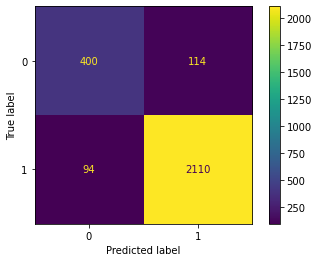

In [54]:
plot_confusion_matrix(estimator=m, X=valid_LATGPS, y_true=valid_y)

bank_branch_clients

In [55]:
valid_BBRC = valid_xs.copy()
valid_BBRC['bank_branch_clients'] = np.random.permutation(valid_BBRC['bank_branch_clients'])
m.score(valid_BBRC, valid_y)

0.9249448123620309

In [91]:
feat_imp['bank_branch_clients'] = std_score - m.score(valid_BBRC,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Contract,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres
0,0.000736,0.001472,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


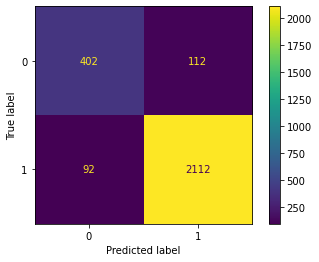

In [56]:
plot_confusion_matrix(estimator=m, X=valid_BBRC, y_true=valid_y)

loannumber

In [93]:
valid_LN = valid_xs.copy()
valid_LN['loannumber'] = np.random.permutation(valid_LN['loannumber'])
m.score(valid_LN, valid_y)

0.9249448123620309

In [94]:
feat_imp['loannumber'] = std_score - m.score(valid_LN,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Contract,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres
0,0.000736,0.001472,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


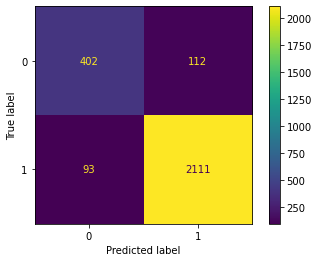

In [58]:
plot_confusion_matrix(estimator=m, X=valid_LN, y_true=valid_y)

loanamount

In [59]:
valid_LA = valid_xs.copy()
valid_LA['loanamount'] = np.random.permutation(valid_LA['loanamount'])
m.score(valid_LA, valid_y)

0.7615894039735099

In [95]:
feat_imp['loanamount'] = std_score - m.score(valid_LA,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Contract,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres
0,0.000736,0.001472,0.0,0.0,0.163355,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


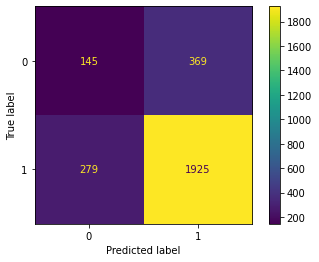

In [60]:
plot_confusion_matrix(estimator=m, X=valid_LA, y_true=valid_y)

totaldue

In [61]:
valid_TD = valid_xs.copy()
valid_TD['totaldue'] = np.random.permutation(valid_TD['totaldue'])
m.score(valid_TD, valid_y)

0.7601177336276674

In [96]:
feat_imp['totaldue'] = std_score - m.score(valid_TD,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Contract,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


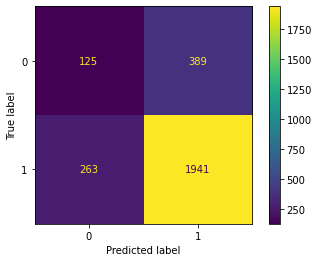

In [62]:
plot_confusion_matrix(estimator=m, X=valid_TD, y_true=valid_y)

termdays

In [63]:
valid_TermD = valid_xs.copy()
valid_TermD ['termdays'] = np.random.permutation(valid_TermD ['termdays'])
m.score(valid_TermD , valid_y)

0.9245768947755703

In [97]:
feat_imp['termdays'] = std_score - m.score(valid_TermD,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Contract,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


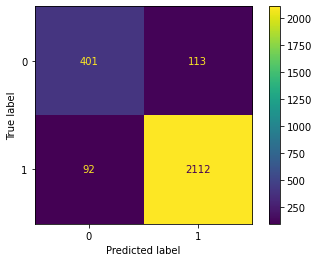

In [64]:
plot_confusion_matrix(estimator=m, X=valid_TermD , y_true=valid_y)

referred

In [65]:
valid_ref = valid_xs.copy()
valid_ref['referred'] = np.random.permutation(valid_ref ['referred'])
m.score(valid_ref, valid_y)

0.9249448123620309

In [98]:
feat_imp['referred'] = std_score - m.score(valid_ref,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Contract,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


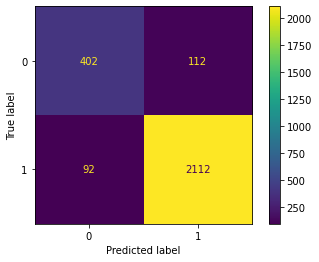

In [66]:
plot_confusion_matrix(estimator=m, X=valid_ref , y_true=valid_y)

realage

In [67]:
valid_RA = valid_xs.copy()
valid_RA['realage'] = np.random.permutation(valid_RA ['realage'])
m.score(valid_RA, valid_y)

0.9153789551140544

In [99]:
feat_imp['realage'] = std_score - m.score(valid_RA,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Contract,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


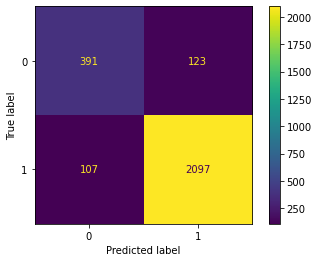

In [68]:
plot_confusion_matrix(estimator=m, X=valid_RA , y_true=valid_y)

TipoInteresAhora

In [69]:
valid_TIA = valid_xs.copy()
valid_TIA['TipoInteresAhora'] = np.random.permutation(valid_TIA['TipoInteresAhora'])
m.score(valid_TIA, valid_y)

0.9249448123620309

In [100]:
feat_imp['TipoInteresAhora'] = std_score - m.score(valid_TIA,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Contract,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


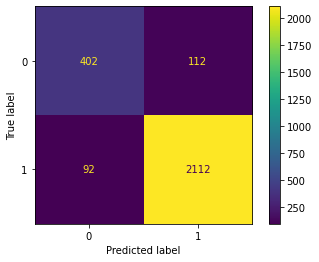

In [70]:
plot_confusion_matrix(estimator=m, X=valid_TIA , y_true=valid_y)

bank_account_Current

In [71]:
valid_BAC = valid_xs.copy()
valid_BAC['bank_account_Current'] = np.random.permutation(valid_BAC['bank_account_Current'])
m.score(valid_BAC, valid_y)

0.9249448123620309

In [101]:
feat_imp['bank_account_Current'] = std_score - m.score(valid_BAC,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Contract,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


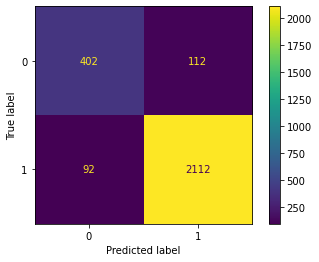

In [72]:
plot_confusion_matrix(estimator=m, X=valid_BAC, y_true=valid_y)

bank_account_Other

In [73]:
valid_BAO = valid_xs.copy()
valid_BAO['bank_account_Other'] = np.random.permutation(valid_BAO['bank_account_Other'])
m.score(valid_BAO, valid_y)

0.9249448123620309

In [102]:
feat_imp['bank_account_Other'] = std_score - m.score(valid_BAO,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Contract,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


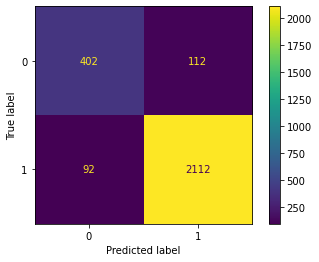

In [74]:
plot_confusion_matrix(estimator=m, X=valid_BAO, y_true=valid_y)

bank_account_savings

In [75]:
valid_BAS = valid_xs.copy()
valid_BAS['bank_account_Savings'] = np.random.permutation(valid_BAS['bank_account_Savings'])
m.score(valid_BAS, valid_y)

0.9249448123620309

In [103]:
feat_imp['bank_account_Savings'] = std_score - m.score(valid_BAS,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Contract,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


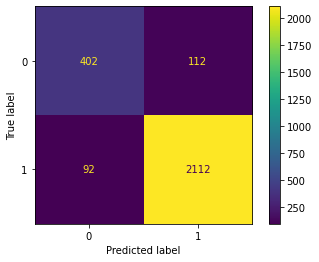

In [76]:
plot_confusion_matrix(estimator=m, X=valid_BAS, y_true=valid_y)

level_of_education_clients_Graduate

In [77]:
valid_LOECG = valid_xs.copy()
valid_LOECG['level_of_education_clients_Graduate'] = np.random.permutation(valid_LOECG['level_of_education_clients_Graduate'])
m.score(valid_LOECG, valid_y)

0.9249448123620309

In [104]:
feat_imp['level_of_education_clients_Graduate'] = std_score - m.score(valid_LOECG,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Contract,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


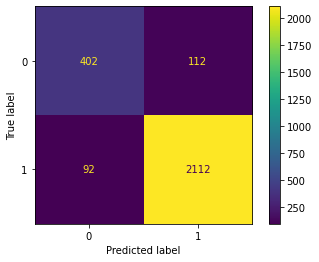

In [78]:
plot_confusion_matrix(estimator=m, X=valid_LOECG, y_true=valid_y)

level_of_education_PostGraduate

In [80]:
valid_LOECPG = valid_xs.copy()
valid_LOECPG ['level_of_education_clients_Post-Graduate'] = np.random.permutation(valid_LOECPG ['level_of_education_clients_Post-Graduate'])
m.score(valid_LOECPG , valid_y)

0.9249448123620309

In [105]:
feat_imp['level_of_education_clients_Post-Graduate'] = std_score - m.score(valid_LOECPG,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


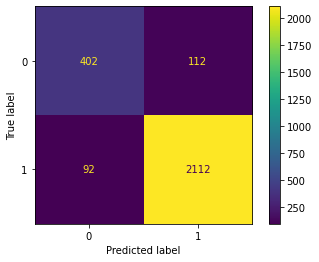

In [81]:
plot_confusion_matrix(estimator=m, X=valid_LOECPG , y_true=valid_y)

level_of_education_clients_Primary

In [82]:
valid_LOECP = valid_xs.copy()
valid_LOECP ['level_of_education_clients_Primary'] = np.random.permutation(valid_LOECP ['level_of_education_clients_Primary'])
m.score(valid_LOECP , valid_y)

0.9249448123620309

In [106]:
feat_imp['level_of_education_clients_Primary'] = std_score - m.score(valid_LOECP,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


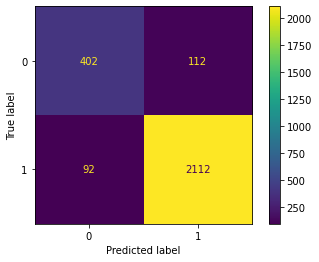

In [83]:
plot_confusion_matrix(estimator=m, X=valid_LOECP , y_true=valid_y)

level_of_educationclients_Secondary

In [85]:
valid_LOECS = valid_xs.copy()
valid_LOECS ['level_of_education_clients_Secondary'] = np.random.permutation(valid_LOECS ['level_of_education_clients_Secondary'])
m.score(valid_LOECS , valid_y)

0.9249448123620309

In [107]:
feat_imp['level_of_education_clients_Secondary'] = std_score - m.score(valid_LOECS,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


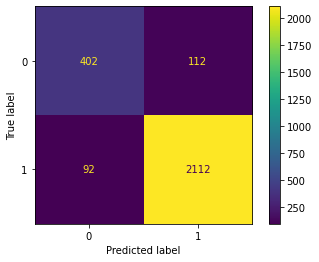

In [86]:
plot_confusion_matrix(estimator=m, X=valid_LOECS , y_true=valid_y)

level_of_education_clients_Unknown

In [87]:
valid_LOECU = valid_xs.copy()
valid_LOECU ['level_of_education_clients_Unknown'] = np.random.permutation(valid_LOECU ['level_of_education_clients_Unknown'])
m.score(valid_LOECU , valid_y)

0.9249448123620309

In [108]:
feat_imp['level_of_education_clients_Unknown'] = std_score - m.score(valid_LOECU,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


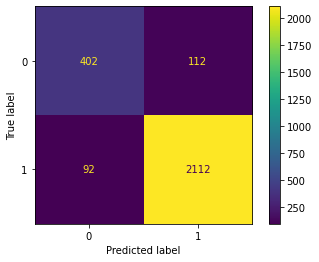

In [88]:
plot_confusion_matrix(estimator=m, X=valid_LOECU , y_true=valid_y)

bank_name_client_Access Bank

In [89]:
valid_BNAB = valid_xs.copy()
valid_BNAB  ['bank_name_client_Access Bank'] = np.random.permutation(valid_BNAB  ['bank_name_client_Access Bank'])
m.score(valid_BNAB , valid_y)

0.9249448123620309

In [109]:
feat_imp['bank_name_client_Access Bank'] = std_score - m.score(valid_BNAB,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


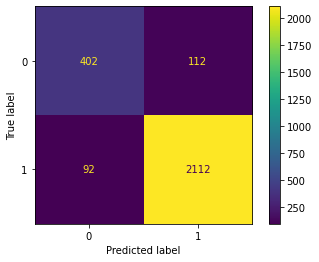

In [111]:
plot_confusion_matrix(estimator=m, X=valid_BNAB  , y_true=valid_y)

bank_name_client_Diamond Bank

In [110]:
valid_BNCDB = valid_xs.copy()
valid_BNCDB['bank_name_client_Diamond Bank'] = np.random.permutation(valid_BNCDB['bank_name_client_Diamond Bank'])
m.score(valid_BNCDB , valid_y)

0.9249448123620309

In [112]:
feat_imp['bank_name_client_Diamond Bank'] = std_score - m.score(valid_BNCDB,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


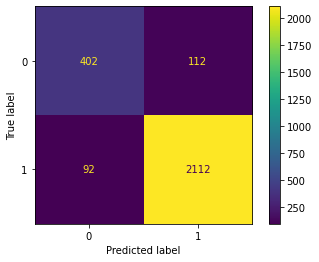

In [113]:
plot_confusion_matrix(estimator=m, X=valid_BNCDB  , y_true=valid_y)

bank_name_client_EcoBank


In [114]:
valid_BNCEco = valid_xs.copy()
valid_BNCEco['bank_name_client_EcoBank'] = np.random.permutation(valid_BNCEco['bank_name_client_Diamond Bank'])
m.score(valid_BNCEco , valid_y)

0.9249448123620309

In [115]:
feat_imp['bank_name_client_EcoBank'] = std_score - m.score(valid_BNCEco,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


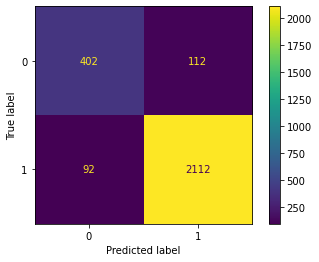

In [116]:
plot_confusion_matrix(estimator=m, X=valid_BNCEco  , y_true=valid_y)

bank_name_client_FCMB

In [117]:
valid_BNCFCMB = valid_xs.copy()
valid_BNCFCMB ['bank_name_client_FCMB'] = np.random.permutation(valid_BNCFCMB ['bank_name_client_FCMB'])
m.score(valid_BNCFCMB  , valid_y)

0.9249448123620309

In [118]:
feat_imp['bank_name_client_FCMB'] = std_score - m.score(valid_BNCFCMB ,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


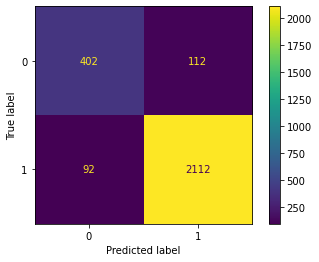

In [119]:
plot_confusion_matrix(estimator=m, X=valid_BNCFCMB   , y_true=valid_y)

bank_name_client_Fidelity Bank

In [120]:
valid_BNCFiB = valid_xs.copy()
valid_BNCFiB ['bank_name_client_Fidelity Bank'] = np.random.permutation(valid_BNCFiB ['bank_name_client_Fidelity Bank'])
m.score(valid_BNCFiB  , valid_y)

0.9249448123620309

In [121]:
feat_imp['bank_name_client_Fidelity Bank'] = std_score - m.score(valid_BNCFiB ,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


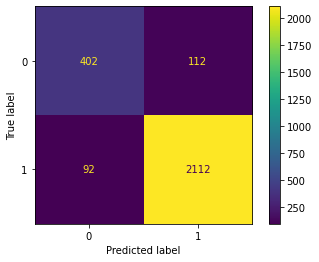

In [122]:
plot_confusion_matrix(estimator=m, X=valid_BNCFiB   , y_true=valid_y)

bank_name_client_First Bank

In [123]:
valid_BNCfstB = valid_xs.copy()
valid_BNCfstB ['bank_name_client_First Bank'] = np.random.permutation(valid_BNCfstB ['bank_name_client_First Bank'])
m.score(valid_BNCfstB  , valid_y)

0.9249448123620309

In [124]:
feat_imp['bank_name_client_First Bank'] = std_score - m.score(valid_BNCfstB ,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


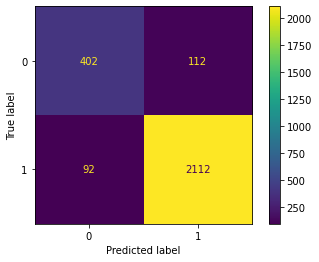

In [125]:
plot_confusion_matrix(estimator=m, X=valid_BNCfstB   , y_true=valid_y)

bank_name_client_GT Bank

In [126]:
valid_BNCGTB = valid_xs.copy()
valid_BNCGTB ['bank_name_client_GT Bank'] = np.random.permutation(valid_BNCGTB ['bank_name_client_GT Bank'])
m.score(valid_BNCGTB  , valid_y)

0.9249448123620309

In [127]:
feat_imp['bank_name_client_GT Bank'] = std_score - m.score(valid_BNCGTB,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


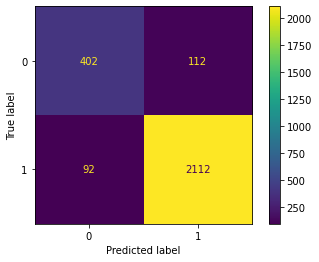

In [128]:
plot_confusion_matrix(estimator=m, X=valid_BNCGTB   , y_true=valid_y)

bank_name_client_Heritage Bank

In [129]:
valid_BNCHB = valid_xs.copy()
valid_BNCHB ['bank_name_client_Heritage Bank'] = np.random.permutation(valid_BNCHB ['bank_name_client_Heritage Bank'])
m.score(valid_BNCHB , valid_y)

0.9249448123620309

In [130]:
feat_imp['bank_name_client_Heritage Bank'] = std_score - m.score(valid_BNCHB,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


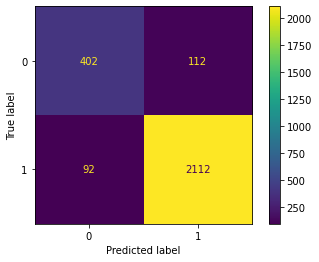

In [131]:
plot_confusion_matrix(estimator=m, X=valid_BNCHB   , y_true=valid_y)

bank_name_client_Keystone Bank

In [132]:
valid_BNCKB = valid_xs.copy()
valid_BNCKB ['bank_name_client_Keystone Bank'] = np.random.permutation(valid_BNCKB ['bank_name_client_Keystone Bank'])
m.score(valid_BNCKB , valid_y)

0.9249448123620309

In [133]:
feat_imp['bank_name_client_Keystone Bank'] = std_score - m.score(valid_BNCKB,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


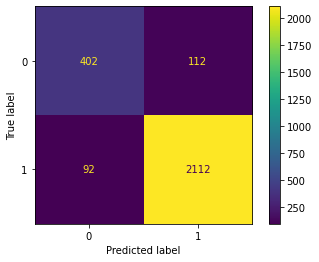

In [134]:
plot_confusion_matrix(estimator=m, X=valid_BNCKB  , y_true=valid_y)

'bank_name_client_Skye Bank'

In [135]:
valid_BNCSB = valid_xs.copy()
valid_BNCSB['bank_name_client_Skye Bank'] = np.random.permutation(valid_BNCKB ['bank_name_client_Skye Bank'])
m.score(valid_BNCSB , valid_y)

0.9249448123620309

In [136]:
feat_imp['bank_name_client_Skye Bank'] = std_score - m.score(valid_BNCSB,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


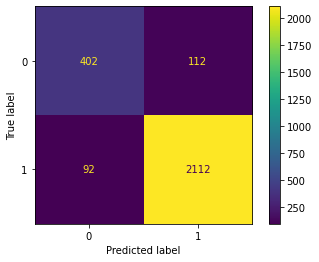

In [137]:
plot_confusion_matrix(estimator=m, X=valid_BNCSB  , y_true=valid_y)

 'bank_name_client_Stanbic IBTC'

In [138]:
valid_BNCIBTC = valid_xs.copy()
valid_BNCIBTC[ 'bank_name_client_Stanbic IBTC'] = np.random.permutation(valid_BNCIBTC[ 'bank_name_client_Stanbic IBTC'])
m.score(valid_BNCIBTC , valid_y)

0.9249448123620309

In [139]:
feat_imp[ 'bank_name_client_Stanbic IBTC'] = std_score - m.score(valid_BNCIBTC,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


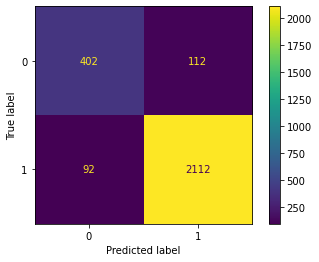

In [140]:
plot_confusion_matrix(estimator=m, X=valid_BNCIBTC , y_true=valid_y)

bank_name_client_Standard Chartered

In [142]:
valid_BNCStC = valid_xs.copy()
valid_BNCStC[ 'bank_name_client_Standard Chartered'] = np.random.permutation(valid_BNCStC[ 'bank_name_client_Standard Chartered'])
m.score(valid_BNCStC , valid_y)

0.9249448123620309

In [143]:
feat_imp[ 'bank_name_client_Standard Chartered'] = std_score - m.score(valid_BNCStC,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


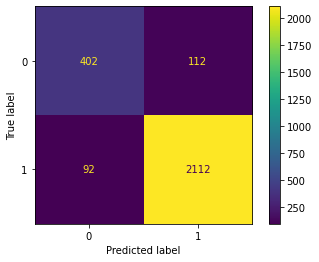

In [144]:
plot_confusion_matrix(estimator=m, X=valid_BNCStC , y_true=valid_y)

bank_name_client_Sterling Bank

In [145]:
valid_BNCSteB = valid_xs.copy()
valid_BNCSteB[ 'bank_name_client_Sterling Bank'] = np.random.permutation(valid_BNCSteB[ 'bank_name_client_Sterling Bank'])
m.score(valid_BNCSteB , valid_y)

0.9249448123620309

In [146]:
feat_imp[ 'bank_name_client_Sterling Bank'] = std_score - m.score(valid_BNCSteB,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


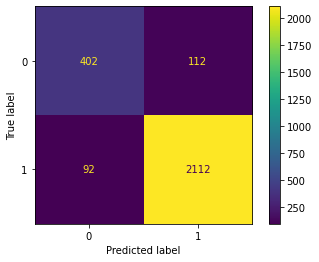

In [147]:
plot_confusion_matrix(estimator=m, X=valid_BNCSteB , y_true=valid_y)

bank_name_client_UBA

In [148]:
valid_BNCUBA = valid_xs.copy()
valid_BNCUBA [ 'bank_name_client_UBA'] = np.random.permutation(valid_BNCUBA [ 'bank_name_client_UBA'])
m.score(valid_BNCUBA  , valid_y)

0.9249448123620309

In [149]:
feat_imp[ 'bank_name_client_UBA'] = std_score - m.score(valid_BNCUBA ,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


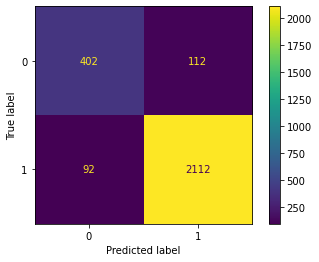

In [150]:
plot_confusion_matrix(estimator=m, X=valid_BNCUBA , y_true=valid_y)

bank_name_client_Union Bank

In [151]:
valid_BNCUnB = valid_xs.copy()
valid_BNCUnB [ 'bank_name_client_Union Bank'] = np.random.permutation(valid_BNCUnB [ 'bank_name_client_Union Bank'])
m.score(valid_BNCUnB  , valid_y)

0.9249448123620309

In [152]:
feat_imp[ 'bank_name_client_Union Bank'] = std_score - m.score(valid_BNCUnB ,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


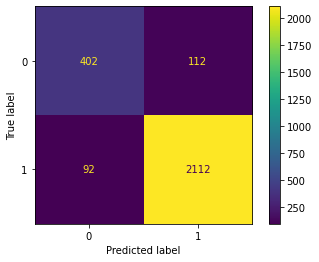

In [153]:
plot_confusion_matrix(estimator=m, X=valid_BNCUnB , y_true=valid_y)

bank_name_client_Unity Bank

In [154]:
valid_BNCUnIB = valid_xs.copy()
valid_BNCUnIB  [ 'bank_name_client_Unity Bank'] = np.random.permutation(valid_BNCUnIB [ 'bank_name_client_Unity Bank'])
m.score(valid_BNCUnIB, valid_y)

0.9249448123620309

In [155]:
feat_imp[ 'bank_name_client_Unity Bank'] = std_score - m.score(valid_BNCUnIB ,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


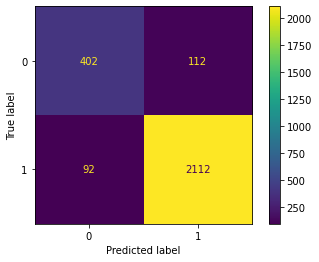

In [156]:
plot_confusion_matrix(estimator=m, X=valid_BNCUnIB , y_true=valid_y)

bank_name_client_Wema Bank

In [157]:
valid_BNCWB = valid_xs.copy()
valid_BNCWB [ 'bank_name_client_Wema Bank'] = np.random.permutation(valid_BNCWB [ 'bank_name_client_Wema Bank'])
m.score(valid_BNCWB , valid_y)

0.9249448123620309

In [158]:
feat_imp[ 'bank_name_client_Wema Bank'] = std_score - m.score(valid_BNCWB  ,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


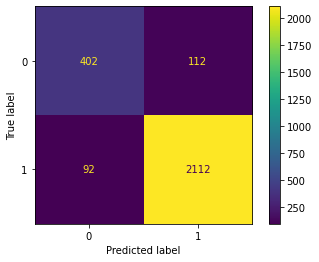

In [159]:
plot_confusion_matrix(estimator=m, X=valid_BNCWB , y_true=valid_y)

bank_name_client_Zenith Bank

In [160]:
valid_BNCZB = valid_xs.copy()
valid_BNCZB [ 'bank_name_client_Zenith Bank'] = np.random.permutation(valid_BNCZB [ 'bank_name_client_Zenith Bank'])
m.score(valid_BNCZB , valid_y)

0.9249448123620309

In [161]:
feat_imp[ 'bank_name_client_Zenith Bank'] = std_score - m.score(valid_BNCZB  ,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


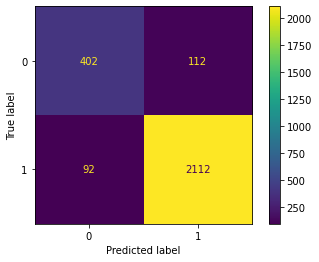

In [162]:
plot_confusion_matrix(estimator=m, X=valid_BNCZB , y_true=valid_y)

employment_status_client_Contract

In [163]:
valid_ESCC = valid_xs.copy()
valid_ESCC [ 'employment_status_client_Contract'] = np.random.permutation(valid_ESCC[ 'employment_status_client_Contract'])
m.score(valid_ESCC, valid_y)

0.9249448123620309

In [164]:
feat_imp[ 'employment_status_client_Contract'] = std_score - m.score(valid_ESCC,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


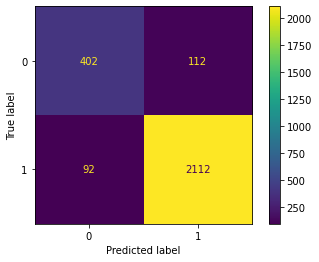

In [165]:
plot_confusion_matrix(estimator=m, X=valid_ESCC, y_true=valid_y)

employment_status_client_Permanent

In [166]:
valid_ESCP = valid_xs.copy()
valid_ESCP [ 'employment_status_client_Permanent'] = np.random.permutation(valid_ESCP[ 'employment_status_client_Permanent'])
m.score(valid_ESCP, valid_y)

0.9249448123620309

In [167]:
feat_imp[ 'employment_status_client_Permanent'] = std_score - m.score(valid_ESCP,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


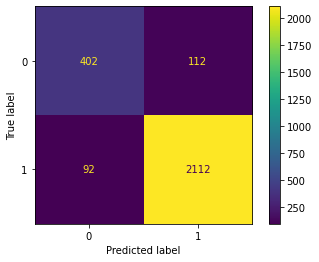

In [168]:
plot_confusion_matrix(estimator=m, X=valid_ESCP, y_true=valid_y)

employment_status_client_Retired

In [169]:
valid_ESCR = valid_xs.copy()
valid_ESCR [ 'employment_status_client_Retired'] = np.random.permutation(valid_ESCR[ 'employment_status_client_Retired'])
m.score(valid_ESCR, valid_y)

0.9249448123620309

In [170]:
feat_imp[ 'employment_status_client_Retired'] = std_score - m.score(valid_ESCR,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


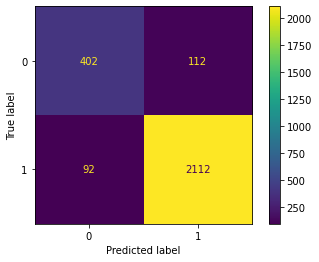

In [171]:
plot_confusion_matrix(estimator=m, X=valid_ESCR, y_true=valid_y)

employment_status_client_Self-Employed

In [172]:
valid_ESCSE = valid_xs.copy()
valid_ESCSE[ 'employment_status_client_Self-Employed'] = np.random.permutation(valid_ESCSE[ 'employment_status_client_Self-Employed'])
m.score(valid_ESCSE, valid_y)

0.9249448123620309

In [173]:
feat_imp[ 'employment_status_client_Self-Employed'] = std_score - m.score(valid_ESCSE,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0.0,0.0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


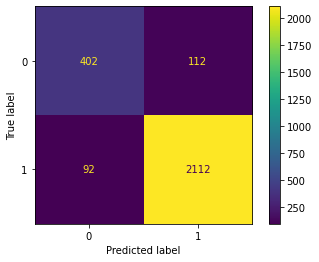

In [174]:
plot_confusion_matrix(estimator=m, X=valid_ESCSE, y_true=valid_y)

employment_status_client_Student

In [175]:
valid_ESCSt = valid_xs.copy()
valid_ESCSt[ 'employment_status_client_Student'] = np.random.permutation(valid_ESCSt[ 'employment_status_client_Student'])
m.score(valid_ESCSt, valid_y)

0.9249448123620309

In [176]:
feat_imp[ 'employment_status_client_Student'] = std_score - m.score(valid_ESCSt,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


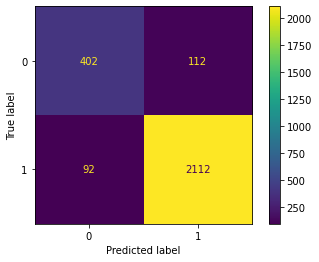

In [177]:
plot_confusion_matrix(estimator=m, X=valid_ESCSt, y_true=valid_y)

employment_status_client_Unemployed

In [178]:
valid_ESCU = valid_xs.copy()
valid_ESCU [ 'employment_status_client_Unemployed'] = np.random.permutation(valid_ESCU [ 'employment_status_client_Unemployed'])
m.score(valid_ESCU , valid_y)

0.9249448123620309

In [179]:
feat_imp[ 'employment_status_client_Unemployed'] = std_score - m.score(valid_ESCU ,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


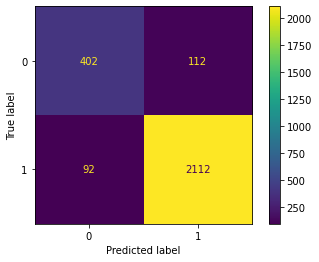

In [180]:
plot_confusion_matrix(estimator=m, X=valid_ESCU , y_true=valid_y)

employment_status_client_Unknown

In [181]:
valid_ESCUk = valid_xs.copy()
valid_ESCUk [ 'employment_status_client_Unknown'] = np.random.permutation(valid_ESCUk [ 'employment_status_client_Unknown'])
m.score(valid_ESCUk , valid_y)

0.9249448123620309

In [182]:
feat_imp[ 'employment_status_client_Unknown'] = std_score - m.score(valid_ESCUk ,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


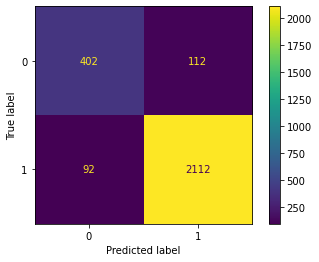

In [183]:
plot_confusion_matrix(estimator=m, X=valid_ESCUk , y_true=valid_y)

is_late_for_firstpay

In [184]:
valid_late = valid_xs.copy()
valid_late[ 'is_late_for_firstpay'] = np.random.permutation(valid_late[ 'is_late_for_firstpay'])
m.score(valid_late, valid_y)

0.9249448123620309

In [185]:
feat_imp[ 'is_late_for_firstpay'] = std_score - m.score(valid_late,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


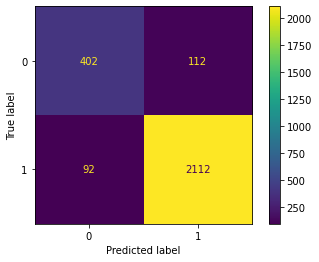

In [186]:
plot_confusion_matrix(estimator=m, X=valid_late, y_true=valid_y)

exceeds_loan_term_days

In [187]:
valid_late = valid_xs.copy()
valid_late[ 'exceeds_loan_term_days'] = np.random.permutation(valid_late[ 'exceeds_loan_term_days'])
m.score(valid_late, valid_y)

0.9249448123620309

In [188]:
feat_imp[ 'exceeds_loan_term_days'] = std_score - m.score(valid_late,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


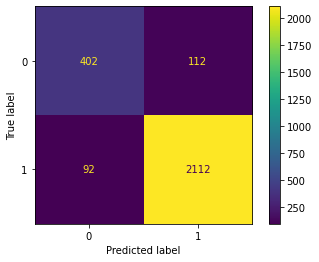

In [189]:
plot_confusion_matrix(estimator=m, X=valid_late, y_true=valid_y)

TipoInteres

In [190]:
valid_late = valid_xs.copy()
valid_late[ 'TipoInteres'] = np.random.permutation(valid_late[ 'TipoInteres'])
m.score(valid_late, valid_y)

0.9249448123620309

In [191]:
feat_imp[ 'TipoInteres'] = std_score - m.score(valid_late,valid_y)
feat_imp.head()

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


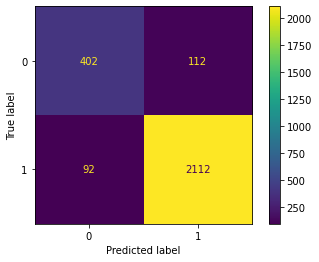

In [192]:
plot_confusion_matrix(estimator=m, X=valid_late, y_true=valid_y)

In [195]:
from google.colab.data_table import DataTable
DataTable.max_columns = 50
feat_imp

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,...,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.000736,0.001472,0.0,0.0,0.163355,0.164827,0.000368,0.0,0.009566,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**simplify model**

In [197]:
train_simple = train_xs.copy()
valid_simple = valid_xs.copy()
if 'bank_branch_clients' in train_simple:
  train_simple = train_simple.drop(['bank_branch_clients', 'loannumber', 'referred', 'TipoInteresAhora', 'bank_account_Current', 'bank_account_Other', 'bank_account_Savings', 'level_of_education_clients_Graduate', 'level_of_education_clients_Post-Graduate', 'level_of_education_clients_Primary', 'level_of_education_clients_Secondary', 'level_of_education_clients_Unknown', 'bank_name_client_Access Bank', 'bank_name_client_Diamond Bank', 'bank_name_client_EcoBank', 'bank_name_client_FCMB', 'bank_name_client_Fidelity Bank', 'bank_name_client_First Bank', 'bank_name_client_GT Bank', 'bank_name_client_Heritage Bank', 'bank_name_client_Keystone Bank','bank_name_client_Skye Bank', 'bank_name_client_Stanbic IBTC', 'bank_name_client_Standard Chartered', 'bank_name_client_Sterling Bank', 'bank_name_client_UBA', 'bank_name_client_Union Bank', 'bank_name_client_Unity Bank', 'bank_name_client_Wema Bank', 'bank_name_client_Zenith Bank','employment_status_client_Contract', 'employment_status_client_Permanent', 'employment_status_client_Retired', 'employment_status_client_Self-Employed', 'employment_status_client_Student', 'employment_status_client_Unemployed', 'employment_status_client_Unknown', 'is_late_for_firstpay', 'exceeds_loan_term_days', 'TipoInteres'], axis=1)
  valid_simple = valid_simple.drop(['bank_branch_clients', 'loannumber','referred', 'TipoInteresAhora', 'bank_account_Current', 'bank_account_Other', 'bank_account_Savings', 'level_of_education_clients_Graduate', 'level_of_education_clients_Post-Graduate', 'level_of_education_clients_Primary', 'level_of_education_clients_Secondary', 'level_of_education_clients_Unknown', 'bank_name_client_Access Bank', 'bank_name_client_Diamond Bank', 'bank_name_client_EcoBank', 'bank_name_client_FCMB', 'bank_name_client_Fidelity Bank', 'bank_name_client_First Bank', 'bank_name_client_GT Bank', 'bank_name_client_Heritage Bank', 'bank_name_client_Keystone Bank','bank_name_client_Skye Bank', 'bank_name_client_Stanbic IBTC', 'bank_name_client_Standard Chartered', 'bank_name_client_Sterling Bank', 'bank_name_client_UBA', 'bank_name_client_Union Bank', 'bank_name_client_Unity Bank', 'bank_name_client_Wema Bank', 'bank_name_client_Zenith Bank','employment_status_client_Contract', 'employment_status_client_Permanent', 'employment_status_client_Retired', 'employment_status_client_Self-Employed', 'employment_status_client_Student', 'employment_status_client_Unemployed', 'employment_status_client_Unknown', 'is_late_for_firstpay', 'exceeds_loan_term_days', 'TipoInteres'], axis=1)
valid_simple.head

<bound method NDFrame.head of        Unnamed: 0  longitude_gps  latitude_gps  loanamount  totaldue  \
1               1       3.325598      7.119403     10000.0   13000.0   
5               5       3.362850      6.642485     10000.0   11500.0   
14             14       3.381093      6.608266     30000.0   34500.0   
18             18       3.381093      6.608266     30000.0   34500.0   
22             22       3.357961      6.512517     20000.0   24500.0   
...           ...            ...           ...         ...       ...   
13682       13682       7.046360      5.499944     40000.0   44000.0   
13684       13684       7.046360      5.499944     40000.0   44000.0   
13686       13686       7.046360      5.499944     40000.0   44000.0   
13692       13692       3.236753      7.030168     20000.0   24500.0   
13694       13694       3.236753      7.030168     20000.0   24500.0   

       termdays  realage  
1            30       36  
5            15       30  
14           30       27

In [198]:
m = KNeighborsClassifier()
m = m.fit(train_simple, train_y)

In [199]:
m.score(valid_simple, valid_y)

0.9249448123620309

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


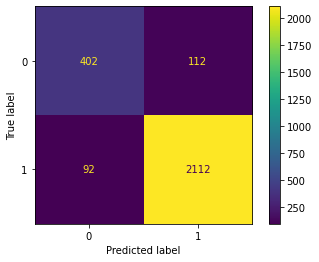

In [200]:
plot_confusion_matrix(estimator=m, X=valid_simple, y_true=valid_y)